# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using merge
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print( num_mice)

249


In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

print(duplicate_mouse_ids, "dtype=", duplicate_mouse_ids.dtype)

['g989'] dtype= object


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data[merged_data["Mouse ID"] != 'g989']


clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = clean_data["Mouse ID"].nunique()

print(num_mice_cleaned)

248


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


summary_statistics_advanced = clean_data.groupby("Drug Regimen").agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}).rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err'
})


display(summary_statistics_advanced)

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.320930           50.446266             43.852013   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                           
             Tumor Volume Std. Dev. Tumor Volume Std. Err  
Drug Regimen                                               
Capomulin                  4.994774              0.329346  
Ceftamin                   6.268188              0.469821  
Infubinol                  6.567243              0.492236  
Ketapril                   8.279709              0.603860  
Naftisol                   8.134708              0.596466  
Placebo                    7.821003              0.581331  
Propriva                   6.622085              0.544332  
Ramicane                   4.846308              0.320955  
Stelasyn                   7.710419              0.573111  
Zoniferol                  6.966589              0.516398

In [17]:
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_advanced = clean_data.groupby("Drug Regimen").agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
}).rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Std.',
    'sem': 'SEM'
})


display(summary_statistics_advanced)

Tumor Volume (mm3)                                          
                           Mean     Median   Variance      Std.       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

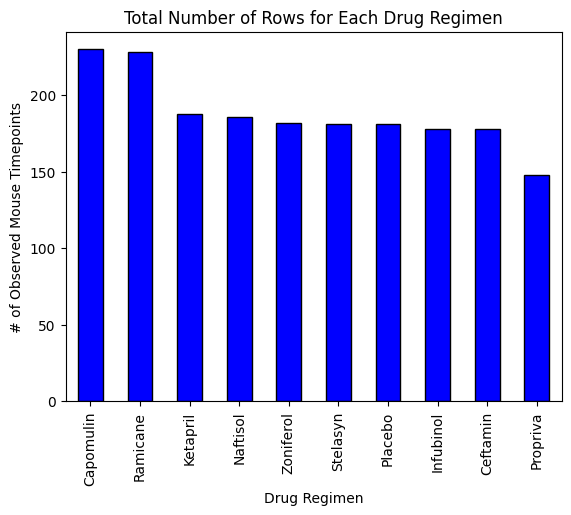

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_data['Drug Regimen'].value_counts().plot(kind='bar', color='blue', edgecolor='black')

#Create a bar plot
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


plt.show()

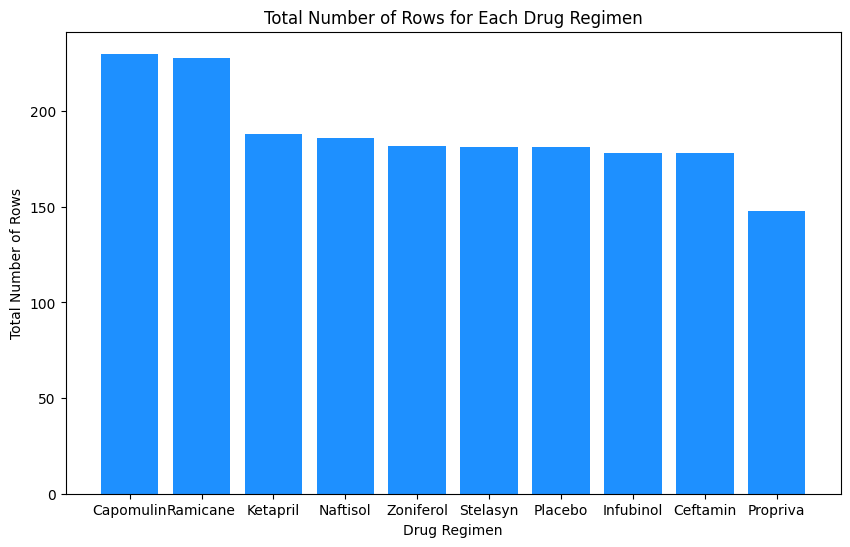

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Set up the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='dodgerblue')


plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Obseved Mouse Timepoints')


plt.show()

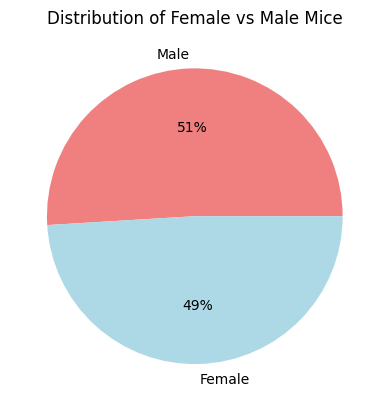

In [21]:
# Generate a pie plot using Pandas 
sex_counts = clean_data['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.0f%%', colors=['lightcoral', 'lightblue'])


plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  


plt.show()

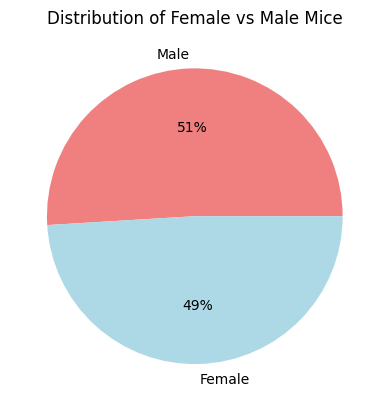

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_data['Sex'].value_counts()

# Generate a pie plot using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.0f%%', colors=['lightcoral', 'lightblue'])


plt.title('Distribution of Female vs Male Mice')


plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_data = clean_data[clean_data['Drug Regimen'].isin(selected_regimens)]
last_timepoints = clean_data.loc[clean_data.groupby('Mouse ID')['Timepoint'].idxmax()]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.loc[clean_data.groupby('Mouse ID')['Timepoint'].idxmax()]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_timepoints = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [24]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_last_timepoints.loc[merged_last_timepoints['Drug Regimen_y'] == treatment, 'Tumor Volume (mm3)_y']
    
    # Calculate the IQR for each treatment
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
   
    print(f"Potential outliers for {treatment}: {potential_outliers.values}")
    
    if not potential_outliers.empty:
        print(potential_outliers)
    else:
        print(f"name: {potential_outliers.name}, Dtype: {potential_outliers.dtype}")

Potential outliers for Capomulin: []
name: Tumor Volume (mm3)_y, Dtype: float64
Potential outliers for Ramicane: []
name: Tumor Volume (mm3)_y, Dtype: float64
Potential outliers for Infubinol: [36.3213458]
31    36.321346
Name: Tumor Volume (mm3)_y, dtype: float64
Potential outliers for Ceftamin: []
name: Tumor Volume (mm3)_y, Dtype: float64


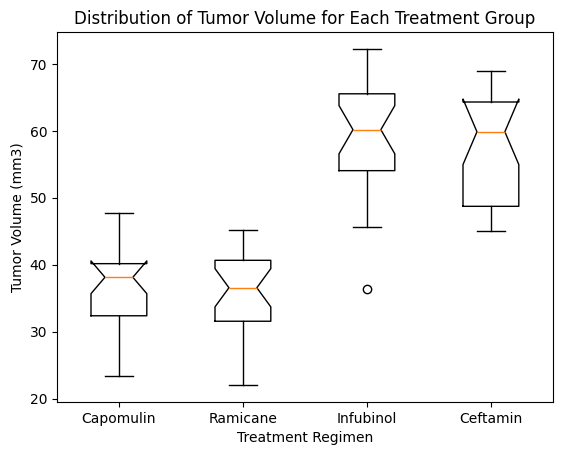

In [25]:
# Create a list to store tumor volume data for each treatment
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    
    tumor_volume = merged_last_timepoints.loc[merged_last_timepoints['Drug Regimen_y'] == treatment, 'Tumor Volume (mm3)_y']
    tumor_volume_data.append(tumor_volume)

# Create a box plot
plt.boxplot(tumor_volume_data, labels=treatments, notch=True, vert=True, patch_artist=False)


plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')


plt.show()


## Line and Scatter Plots

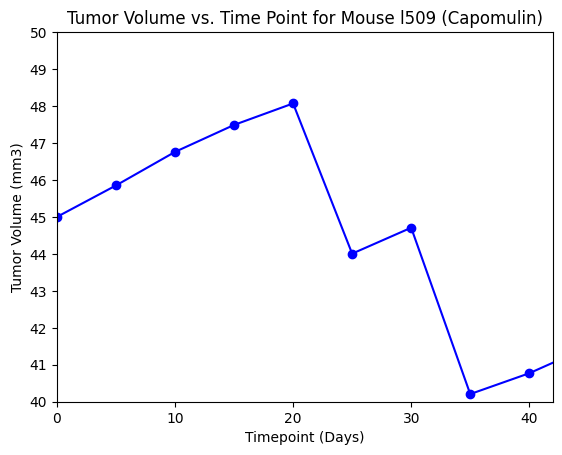

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for the chosen mouse and Capomulin regimen
capomulin_mouse_id = 'l509'

capomulin_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == capomulin_mouse_id)]

# Plot the line plot
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')


plt.xlim(0, 42)  
plt.ylim(40, 50)  


plt.xticks(range(0, 41, 10))
plt.yticks(range(40, 51))


# Adding labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {capomulin_mouse_id} (Capomulin)')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


plt.show()

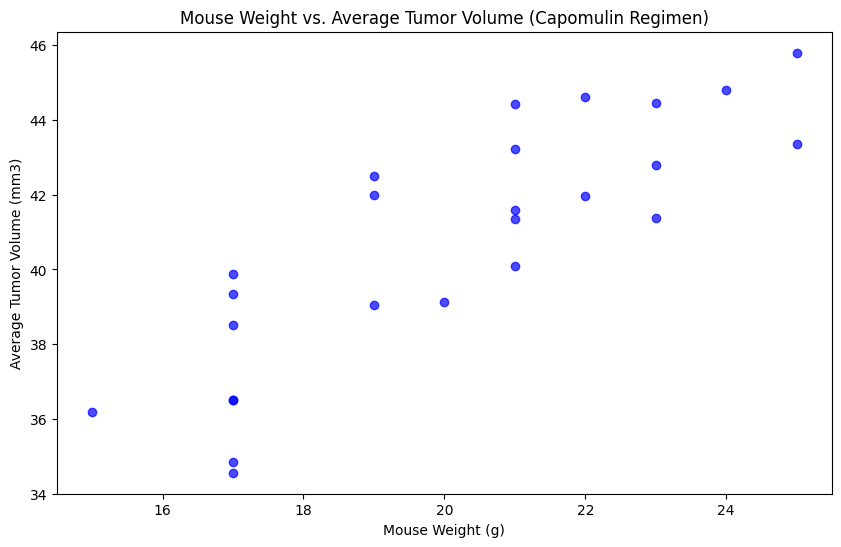

In [28]:
# Group data by Mouse ID to get average tumor volume and weight
capomulin_avg_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  
}).reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)

# Adding labels and title
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


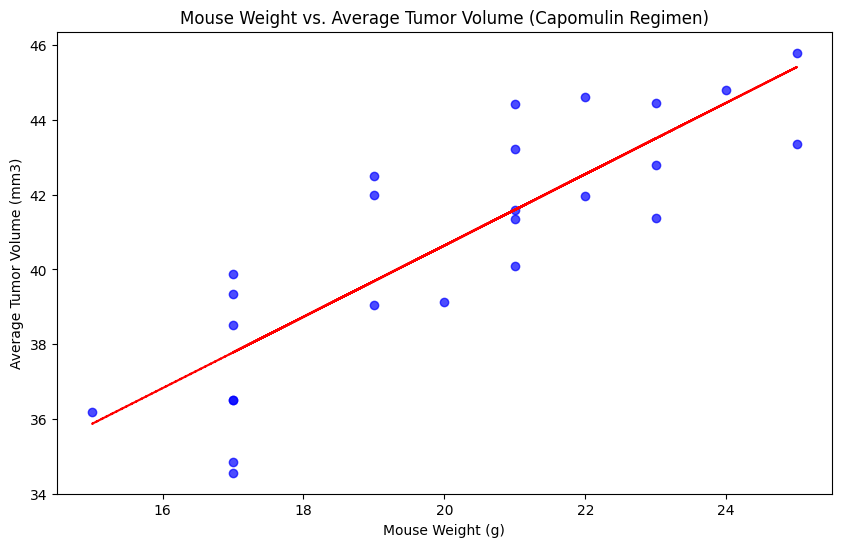

In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_avg_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  
}).reset_index()

# Perform linear regression 
def linear_regression(x, y):
    mean_x, mean_y = sum(x) / len(x), sum(y) / len(y)
    slope = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))) / sum((x[i] - mean_x)**2 for i in range(len(x)))
    intercept = mean_y - slope * mean_x
    return slope, intercept


slope, intercept = linear_regression(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

# Calculate the correlation coefficient
correlation_coefficient_value = sum((x - capomulin_avg_data['Weight (g)'].mean()) * (y - capomulin_avg_data['Tumor Volume (mm3)'].mean()) for x, y in zip(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])) / ((sum((x - capomulin_avg_data['Weight (g)'].mean())**2 for x in capomulin_avg_data['Weight (g)']))**0.5 * (sum((y - capomulin_avg_data['Tumor Volume (mm3)'].mean())**2 for y in capomulin_avg_data['Tumor Volume (mm3)']))**0.5)

# Print the correlation coefficient
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient_value:.2f}')

# Create a scatter plot
plt.figure(figsize=(10, 6))


plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'], color='blue', alpha=0.7)


plt.plot(capomulin_avg_data['Weight (g)'], slope * capomulin_avg_data['Weight (g)'] + intercept, color='red', linestyle='dashed')


plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()